In [30]:
import scvimadz
import scvi
import anndata
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
demo_dir = "/Users/valehvpa/Desktop/scvi-madz-demo"
data_dir = f"{demo_dir}/demo_data_dir"
ts_ref = scvimadz.reference.TabulaSapiensReference(data_dir)

In [4]:
ts_ref.get_datasets_df()

,cell_count,gene_count,tissue,has_cite,has_latent_embedding,is_annotated
key,,,,,,
0e6263fb-01f5-4b9a-8f30-35f6cda125de.h5ad,35682,2000,Lung,False,True,True
9375735f-c715-4d15-9b18-de622e412ddc.h5ad,35682,58870,Lung,False,True,True
9fa65f45-d96e-4bac-b6e2-78027df51d22.h5ad,12297,58870,Bone Marrow,False,True,True
cf3a08f8-f3e2-4bbb-a7da-33d8945424d8.h5ad,5007,58870,Liver,False,True,True
fbcf7e24-d269-42e8-90d6-b9aeb51db36b.h5ad,5007,2000,Liver,False,True,True


In [10]:
df = ts_ref.get_models_df()
df

,class_name,train_dataset,n_hidden,n_layers,n_latent,use_observed_lib_size,init_params
key,,,,,,,
1bfbf358-4223-4791-968a-1e5b0b2435c7.pt,scvi.model.SCVI,fbcf7e24-d269-42e8-90d6-b9aeb51db36b.h5ad,128,1,10,True,"{'kwargs': {'model_kwargs': {}}, 'non_kwargs':..."
bfeb6529-8db7-46ce-99f6-237748798ae4.pt,scvi.model.SCVI,0e6263fb-01f5-4b9a-8f30-35f6cda125de.h5ad,128,1,10,True,"{'kwargs': {'model_kwargs': {}}, 'non_kwargs':..."


In [16]:
model_key = "1bfbf358-4223-4791-968a-1e5b0b2435c7.pt"

In [17]:
df.loc[model_key]

class_name                                                 scvi.model.SCVI
train_dataset                    fbcf7e24-d269-42e8-90d6-b9aeb51db36b.h5ad
n_hidden                                                               128
n_layers                                                                 1
n_latent                                                                10
use_observed_lib_size                                                 True
init_params              {'kwargs': {'model_kwargs': {}}, 'non_kwargs':...
Name: 1bfbf358-4223-4791-968a-1e5b0b2435c7.pt, dtype: object

In [18]:
df.loc[model_key]["init_params"]

"{'kwargs': {'model_kwargs': {}}, 'non_kwargs': {'n_hidden': 128, 'n_latent': 10, 'n_layers': 1, 'dropout_rate': 0.1, 'dispersion': 'gene', 'gene_likelihood': 'zinb', 'latent_distribution': 'normal'}}"

In [6]:
model = ts_ref.load_model(model_key)

In [7]:
model

In [8]:
model.adata

AnnData object with n_obs × n_vars = 5007 × 2000
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'donor_method', '_scvi_batch', '_scvi_labels'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'n_counts', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', '_scvi_manager_uuid', '_scvi_uuid', '_training_mode', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: '

In [36]:
adata = ts_ref.load_dataset(df.loc[model_key]["train_dataset"])

In [38]:
adata

AnnData object with n_obs × n_vars = 5007 × 2000
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'donor_method', '_scvi_batch', '_scvi_labels'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'n_counts', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', '_scvi_manager_uuid', '_scvi_uuid', '_training_mode', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: '

In [39]:
latent = model.get_latent_representation()

In [40]:
latent.shape

(5007, 10)

In [41]:
adata.obsm["X_scVI_2"] = latent

In [42]:
sc.pp.neighbors(adata, use_rep="X_scVI_2")

In [43]:
sc.tl.umap(adata, min_dist=0.3)

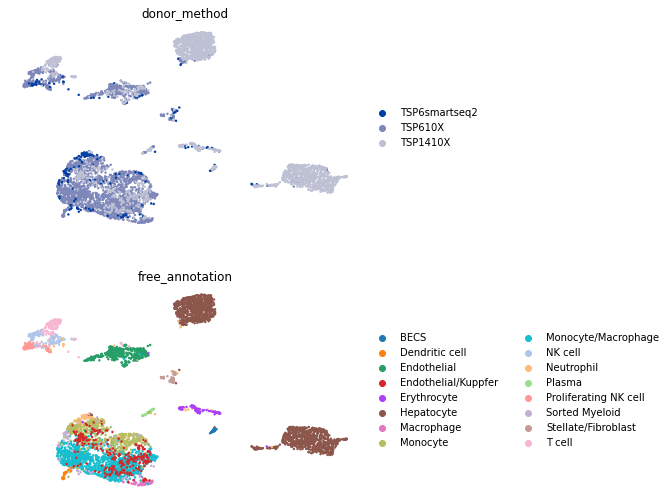

In [59]:
sc.pl.umap(
    adata,
    color=["donor_method", "free_annotation"],
    frameon=False,
    ncols = 1,
)